<a href="https://colab.research.google.com/github/Shashank251225/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING







##### **Project Type**    - Unsupervised
##### **Contribution**-    Team
##### **Team Member 1 -** AMITHA K

##### **Team Member 2 -**APOORVA VISHWAKARMA

##### **Team Member 3 -**ABHISHEK P SADAWARTE

##### **Team Member 4 -**MOHD KHALID
##### **Team Member 5 -**SHASHANK KUMAR YADAV

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**




This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.
In this project, I have done

 1.Exploratory Data Analysis

 2.Understanding what type content is available in different countries

 3.Is Netflix increasingly focusing on TV rather than movies in recent years.
 
 4.Clustering similar content by matching text-based features**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import datetime as dt

%matplotlib inline


### Dataset Loading

In [5]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
netflix = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df = netflix.copy()

### Dataset First View

In [7]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

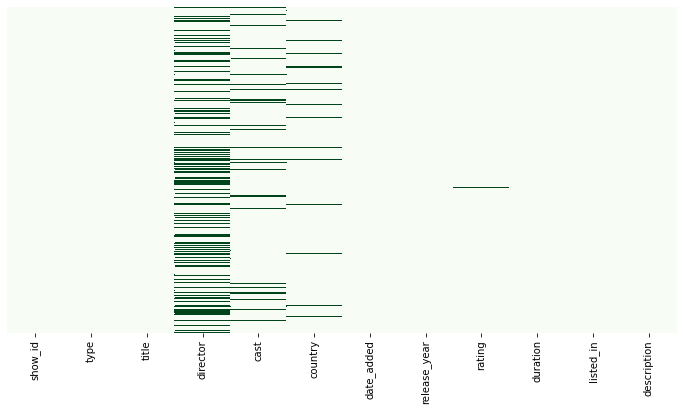

In [12]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='Greens');

In [13]:
#HANDLING MISSING VALUES
df['director'].fillna('unknown', inplace=True)
df['cast'].fillna('unknown', inplace=True)
df['country'].fillna('unknown', inplace=True)
df['date_added'].fillna('unknown', inplace=True)
df['rating'].fillna('unknown', inplace=True)
     

### What did you know about your dataset?

There is a total of 7787 movies / TV shows that is rows and 12 columns in this dataset collected from AlmaBetter

Each row contains the following information: type (Movie or TV Show), title, director, cast, country, rating (ex. PG, PG-13, R, etc.), listed_in (genre), and plot description.Answer Here

We have 5 columns with missing values.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe(include = 'O').T

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,7787,4050,unknown,2389
cast,7787,6832,unknown,718
country,7787,682,United States,2555
date_added,7787,1566,"January 1, 2020",118
rating,7787,15,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


### Variables Description 


The dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Release Year of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genre

description: The Summary description
Answer Here

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4050
cast            6832
country          682
date_added      1566
release_year      73
rating            15
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
# CONVERTING 'date_added' to datetime format
def date(row):
  a = row['date_added']
  if 'unknown'  not in a:
    month = a.split()[0]
    year = a.split()[-1]
    day = a.split()[1].split(',')[0]
    a = dt.datetime.strptime(f'{month[:3]} {day} {year}' , '%b %d %Y')
    return a
  else:
    return np.nan

df['date_added'] = df.apply(lambda x: date(x), axis=1)

## FEATURE ENGINEERING LISTED_IN 


In [18]:
a = df.copy()

In [19]:
a['listed_in'] = a.listed_in.apply(lambda row: row.split(', '))
a.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

In [20]:
replacing_genre = {'International TV Shows': '-',
                   'TV Dramas': 'Drama',
                   'TV Sci-Fi & Fantasy': 'SciFiFantasy',
                   'Dramas': 'Drama' ,
                   'International Movies': '-',
                   'Horror Movies': 'Horror',
                   'Action & Adventure': 'ActionAdventure',
                   'Independent Movies': '-',
                   'Sci-Fi & Fantasy': 'SciFiFantasy',
                  'TV Mysteries': 'Mystery'       ,
                  'Thrillers': 'Thriller',
                   'Crime TV Shows': 'Crime',
                   'Docuseries': 'Documentary',
                  'Documentaries': 'Documentary', 'Sports Movies': 'Sports',
                   'Comedies':'Comedy',
                   'Anime Series': 'Anime',
                  'Reality TV': 'Reality',
                   'TV Comedies': 'Comedy',
                   'Romantic Movies': 'Romance',
                  'Romantic TV Shows': 'Romance', 
                   'Science & Nature TV': 'Science',
                   'Movies': '-',
                  'British TV Shows': '-',
                   'Korean TV Shows': '-',
                   'Music & Musicals': 'Music',
                  'LGBTQ Movies': 'LGBTQ',
                   'Faith & Spirituality': 'Spirituality', 
                   "Kids' TV": 'Kids',
                  'TV Action & Adventure': 'ActionAdventure',
                   'Spanish-Language TV Shows': '-',
                  'Children & Family Movies': 'Family', 
                   'TV Shows': '-',
                   'Classic Movies': 'Classic',
                  'Cult Movies': 'Cult',
                   'TV Horror': 'Horror',
                   'Stand-Up Comedy & Talk Shows':'Comedy, TalkShow',
                  'Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy', 
                   'Anime Features':'Anime',
                  'TV Thrillers': 'Thriller',
                   'Classic & Cult TV':'Classic, Cult'}

In [21]:
def genre_replace(row, replacing_genre = replacing_genre):
  new_text = []
 
  for word in (row['listed_in']):
    if word in replacing_genre:
      if '-' not in replacing_genre[word]:
       new_text.append(replacing_genre[word])
    else:
      print(word, 'not present in dictionary')

  return(', '.join(new_text))
  

df['Genres'] = a.apply(lambda row: genre_replace(row),axis=1)
df['Genres'] = df['Genres'].apply(lambda row: row.split(', '))
     

In [22]:
(df.explode('Genres')['Genres'].unique())

array(['Drama', 'SciFiFantasy', 'Horror', 'ActionAdventure', 'Mystery',
       'Thriller', 'Crime', 'Documentary', 'Sports', 'Comedy', 'Anime',
       'Reality', 'Romance', 'Science', '', 'Music', 'LGBTQ',
       'Spirituality', 'Kids', 'Family', 'Classic', 'Cult', 'TalkShow',
       'Teen'], dtype=object)

### What all manipulations have you done and insights you found?

Converted date added to date time format

FEATURE ENGINEERING LISTED_IN Genres are extracted and re-defined accordingly. TV and Movie genres are separately defined. These are combined. Topics like International TV Shows are removed as it could bring in a bias by displaying content in reference to American movies.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Figure size 1008x576 with 0 Axes>

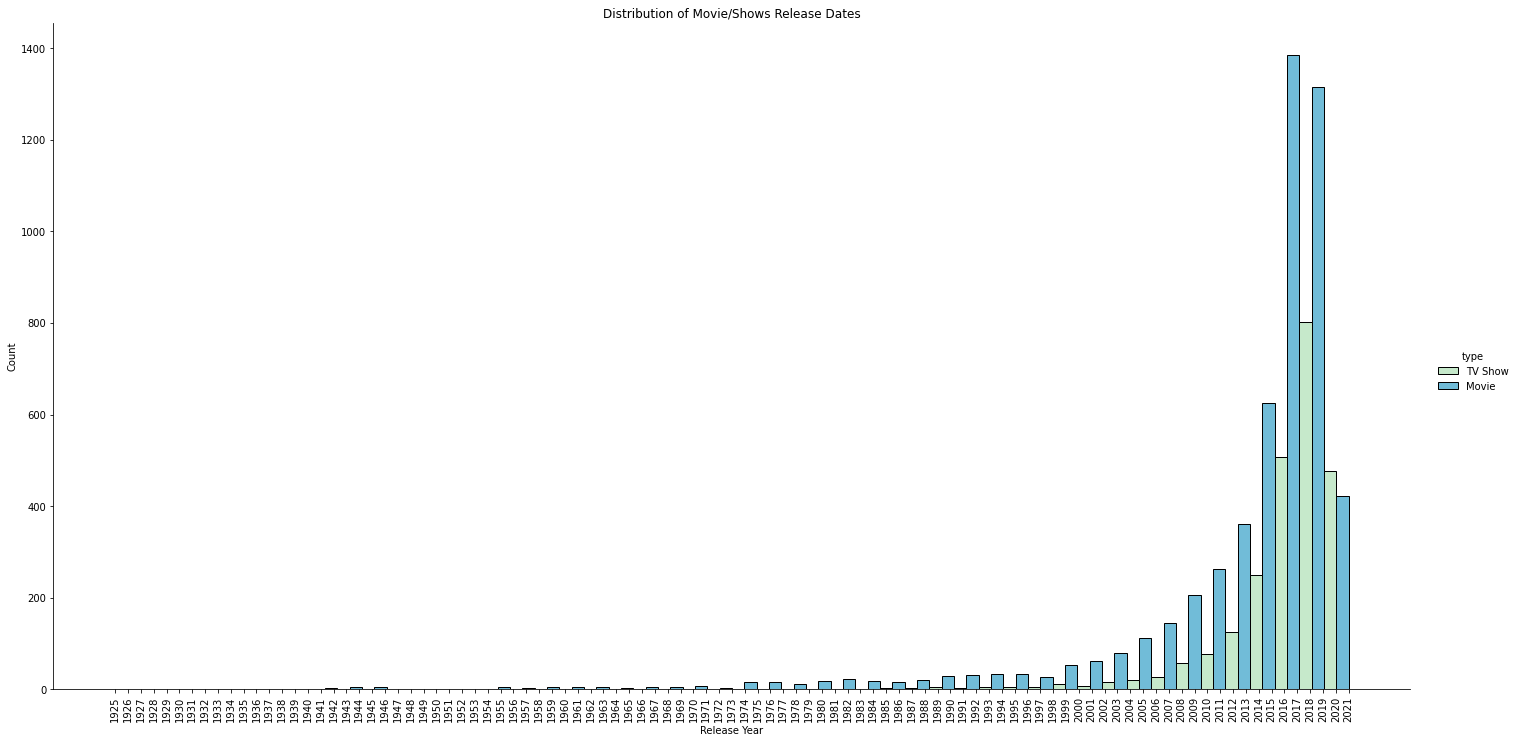

In [25]:
# Chart - 1 visualization code
#Histogram plot of release dates of shows/movies on Netflix
a = plt.figure(figsize=(14,8))
a = sns.displot(x='release_year', hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.xticks(ticks= np.arange(df.release_year.min(),df.release_year.max()+1,1), rotation = 90)
a = plt.title('Distribution of Movie/Shows Release Dates')
a = plt.xlabel('Release Year')

##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.

##### 2. What is/are the insight(s) found from the chart?

Most Movies streaming on the platform were released after 2010
Most TV Shows streaming on the platform were released after 2015
The year 2017 had highest number of Movie and TV show releases on the platform.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the histogram plot we can see that the number of movies and tv shows are increasing in netflix platform and there is increasing trend during pandemic times.

#### Chart - 2

<Figure size 1008x576 with 0 Axes>

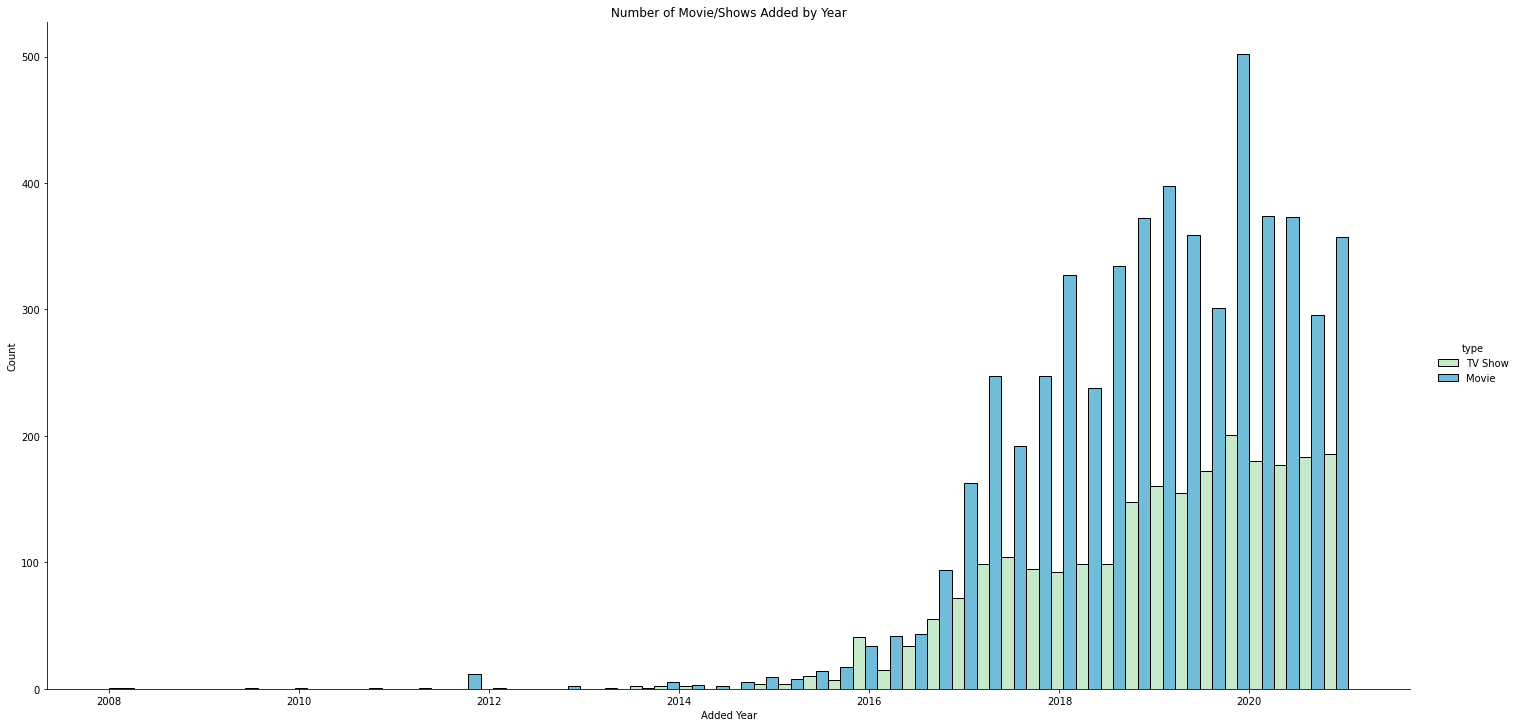

In [26]:
# Chart - 2 visualization code
#Histogram plot of dates of number of shows/movies added by the Streaming giant
a = plt.figure(figsize=(14,8))
a = sns.displot(x= df['date_added'], hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.title('Number of Movie/Shows Added by Year')
a = plt.xlabel('Added Year')

##### 1. Why did you pick the specific chart?

 It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.

##### 2. What is/are the insight(s) found from the chart?

Netflix began adding videos to the platform from 2008 The streaming giant started aggressively adding movies and TV shows from 2017 More movies are added as compared to TV shows

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that tv series are increasing trend as compared to movies , which are in reducing trend.

#### Chart - 3

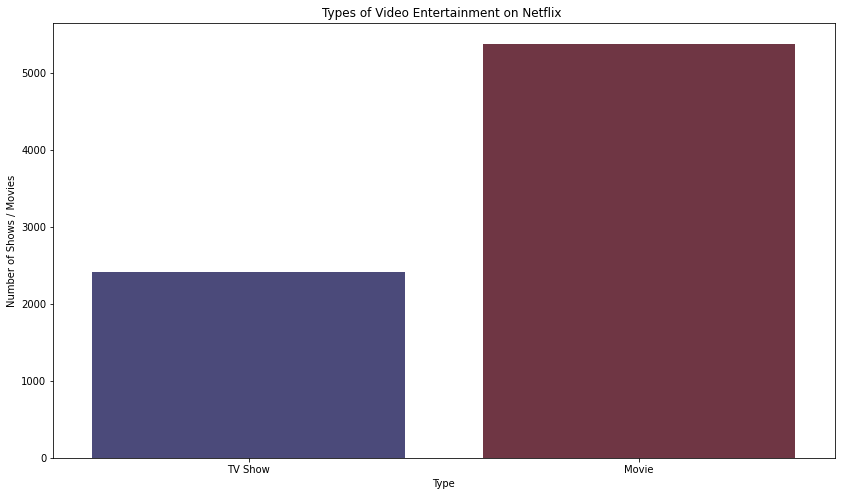

In [27]:
# Chart - 3 visualization code
#Type of Videos on Netflix
a = plt.figure(figsize=(14,8))
a = sns.countplot(x= df['type'], data = df,palette='icefire')
a = plt.title('Types of Video Entertainment on Netflix ')
a = plt.xlabel('Type')
a = plt.ylabel('Number of Shows / Movies')

##### 1. Why did you pick the specific chart?

A count plot Show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

Show the counts of observations in each categorical bin using bars.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

So we can see that netflix is focusing more on movies as compared to the tv series and in future also this trend might continue.

#### Chart - 4

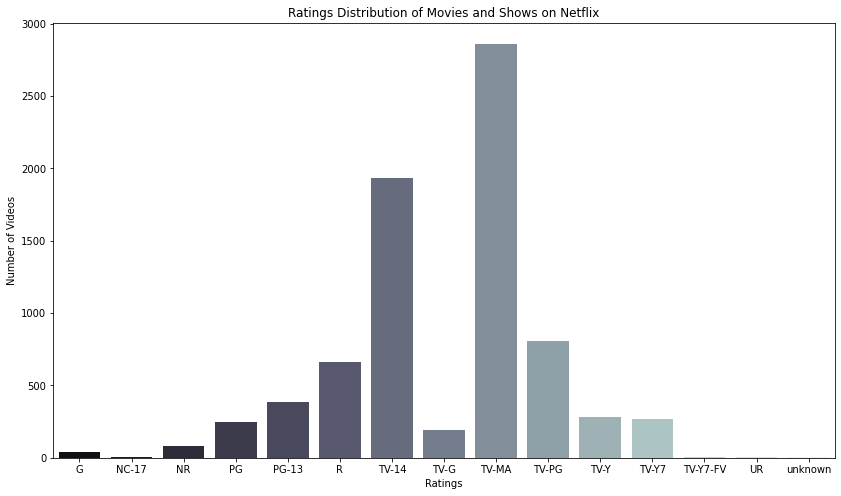

In [28]:
# Chart - 4 visualization code
#Different Ratings on the Platform
a = plt.figure(figsize=(14,8))
d = df.groupby('rating').agg({'show_id':'count'}).reset_index()
a = sns.barplot(x= d['rating'], y=d['show_id'], palette='bone')
a = plt.title('Ratings Distribution of Movies and Shows on Netflix')
a = plt.xlabel('Ratings')
a = plt.ylabel('Number of Videos')

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent

##### 2. What is/are the insight(s) found from the chart?

Most content on Netflix is rated for Mature Audiences and over 14 years old

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix is targeting the older people as compared to the younger generation.
Netflix should try to focus more on younger audiances.

#### Chart - 5

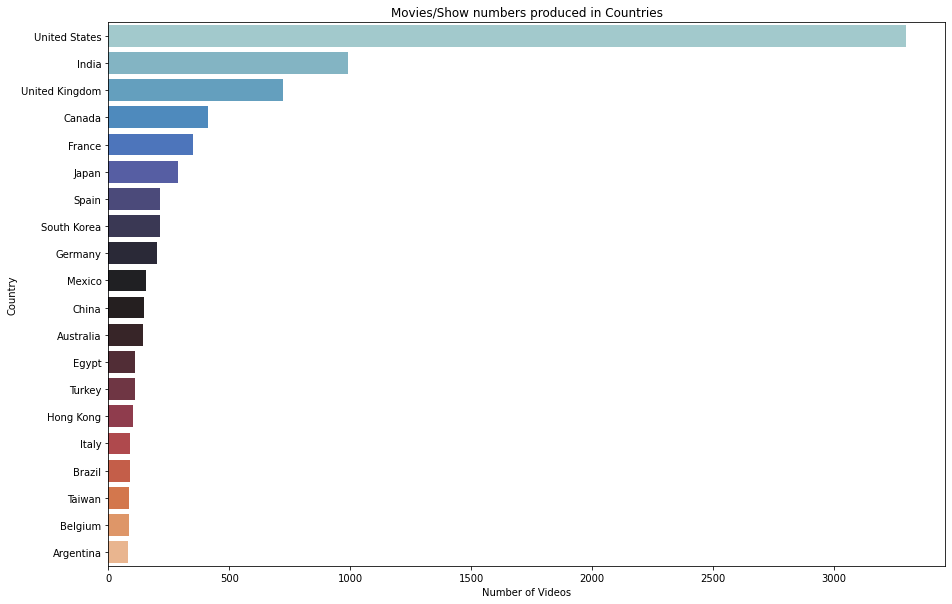

In [29]:
# Chart - 5 visualization code
#Top 10 Countries that produced content on Netflix
a = df[df.country != 'unknown'].loc[:,['show_id','title','country', 'listed_in']].copy()
countrylist = (a['country'].to_list())

newlist = []
for country in countrylist:
  if ',' in country:
    a = country.split(', ')
    newlist = newlist + a
  else:
    newlist.append(country)

country_list = pd.DataFrame({'country' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'country', x = 'id',data = a , palette='icefire')
a = plt.title('Movies/Show numbers produced in Countries')
a = plt.ylabel('Country')
a = plt.xlabel('Number of Videos')
top10countries = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(10).reset_index()['country'].unique()

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars it can be used to compare different values.

##### 2. What is/are the insight(s) found from the chart?

Top Countries in Netflix are:

1.United States 2.India 3.United Kingdom 4.Canada 5.France

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Majority of videos are produced in usa and then india so netflix should try to target other gegions too .

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***